<a href="https://colab.research.google.com/github/Emily-Weng/Deep-Learning-Basis/blob/main/108703042%E8%B3%87%E7%A7%91%E4%B8%89%E7%BF%81%E6%84%89%E5%AA%83_%E7%A8%8B%E5%BC%8F%E4%BD%9C%E6%A5%AD%E4%BA%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

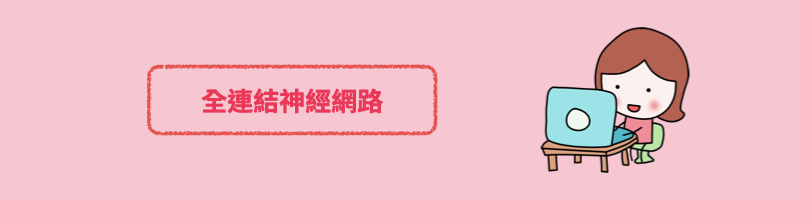

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

### 1. 讀入  Fasion 版的MNSIT 數據集

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 2. 欣賞數據集內容 (非執行必要)

In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

### 將n改為878

In [ ]:
n = 878 

In [ ]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  45, 184,
        181, 178, 188,  97,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   2,   0,   0,   6,   0,   0,   0,   0, 230, 183,
        170, 171, 170, 255,  54,   0,   0,   0,   5,   2,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   1,   0,   0,   0,   5,  82, 192, 207,   9,
          0,   0,   0, 181, 199, 107,  29,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   2,   0,  38, 149, 187, 198, 176, 179, 200,
         91,  74, 197, 201, 199, 203, 194, 166,  89,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   3,   0,  25, 199, 195, 179, 179, 174, 184, 208,
        167, 180, 253, 198, 195, 185, 182, 197, 220,  87,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 154, 199, 177, 176, 178, 183, 193, 188,
        155, 171, 204, 191, 189, 174, 195, 187, 205, 183,   0,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[n]

4

### 改cmap參數的顏色

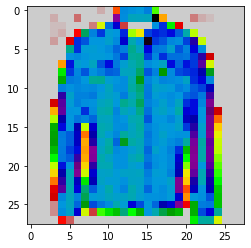

In [ ]:
plt.imshow(x_train[n], cmap='nipy_spectral_r') 

In [ ]:
x_test.shape

(10000, 28, 28)

### 3. 資料整理

先看個範例, 因為 `numpy` 「廣播」的特性, 我們對 `array` 中所有數字要同除以一個數可瞬間完成!

In [ ]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 4. step 1: 打造神經網路

##### a.建立六層hidden layers
##### b.每層使用不同的Activation Fucntion,分別為relu(線性修正單元)、softplus、tanh(雙曲正切激活函數)、sigmoid、hard_sigmoid(計算速度比sigmoid快)、elu、softmax
##### c.神經元數分別為:1000、10240、32、499、51、444、10

In [ ]:
model = Sequential()##打開一個空白的學習機

In [ ]:
model.add(Dense(1000, input_dim=784, activation='relu'))##第一層  

In [ ]:
model.add(Dense(10240, activation='softplus'))##第二層

In [ ]:
model.add(Dense(32, activation='tanh'))##第三層

In [ ]:
model.add(Dense(499, activation='sigmoid'))##第四層

In [ ]:
model.add(Dense(51, activation='hard_sigmoid'))##第五層

In [ ]:
model.add(Dense(444, activation='elu'))##第六層

In [ ]:
model.add(Dense(10, activation='softmax'))##輸出是10個神經元

#### 組裝我們的神經網路

##### learning_rate改為0.8778999

In [ ]:
model.compile(loss='mse', optimizer=SGD(learning_rate=0.8778999), 
              metrics=['accuracy'])## mse平均平方差           #####把mse改成Cross Entropy   ##改learning rate(不一定越大越好)

#### 欣賞我們的作品

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_55 (Dense)             (None, 10240)             10250240  
_________________________________________________________________
dense_56 (Dense)             (None, 32)                327712    
_________________________________________________________________
dense_57 (Dense)             (None, 499)               16467     
_________________________________________________________________
dense_58 (Dense)             (None, 51)                25500     
_________________________________________________________________
dense_59 (Dense)             (None, 444)               23088     
_________________________________________________________________
dense_60 (Dense)             (None, 10)               

In [ ]:
784*100+100

78500

### 5. step 2: 訓練

觀察結果:
#####1.batch_size=100, epochs=20=>highest accuracy:0.9338 
######2.batch_size=889, epochs=87=>highest accuracy: 0.7715  
######3.batch_size=500, epochs=30=>highest accuracy:0.8384
######4.batch_size=150, epochs=25=>highest accuracy: 0.8789
###結論:batch_size以及epochs不一定是越高準確度越好

In [ ]:
model.fit(x_train, y_train, batch_size=150, epochs=25)

NameError: ignored

### 6. step 3: 預測 (testing)

In [ ]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

In [ ]:
y_predict

array([9, 2, 1, ..., 8, 1, 5])

####n改為3000
####cmap改為'Paired'

神經網路預測是: 1


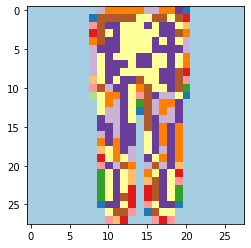

In [ ]:
n = 3000

print('神經網路預測是:', y_predict[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Paired');

我們用互動模式展示我們的訓練成果。

In [ ]:
from ipywidgets import interact_manual

cmap改為'Accent'

In [ ]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Accent')
    print('神經網路判斷為:', y_predict[測試編號])

In [ ]:
interact_manual(test, 測試編號=(0, 9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

到底測試資料總的狀況如何呢? 我們可以給我們神經網路「總評量」。

In [ ]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0213 - accuracy: 0.8557


In [ ]:
print('loss:', score[0])
print('正確率', score[1])

loss: 0.021298548206686974
正確率 0.8557000160217285


### 7. 儲存我們的 model

如果對訓練成果滿意, 我們當然不想每次都再訓練一次! 我們可以把神經網路的架構和訓練好的參數都存起來, 以供日後使用!

在 Colab 上, 我們要先連到自己的 Google Drive。

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


再來是 cd 到你的資料夾中, 我們通常是放到自己 Colab Notebooks 中, 自然你可以指定其他的資料夾。

In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [ ]:
model.save('my_dnn_model')

NameError: ignored